# Week 2: Hypothesis Testing

<hr style="border:2px solid gray">
<a id='outline'></a>

# Outline [^](#outline)

1. [Hypothesis Testing](#section1)
1. [Goodness of Fit](#section2)
1. [Exercises](#exercises)

Up to this point we have discussed probability, because in many physics experiments we are measuring quantities that are ultimately random variables. This allows us to predict how often we might measure the various possible outcomes of our experiment. Statistics, on the other hand, involves studying data we measure to try to determine the values and uncertainties of physical quantities. 

We can therefore think of probability and statistics as inverse problems of one another:
* Studying probability allows us to take physical constants and predict likely outcomes of an experiment
* Studying statistics allows us to take the actual outcome of an experiment and find the values of physical constants that are compatible with data

In this notebook we look at ways of hypothesis testing with noisy (i.e. random, probabilistic) data. This can be as simple as looking at the mean and standard deviation of a dataset we have recorded but we will focus on the generic topic of **Hypothesis Testing**. 

<hr style="border:2px solid gray">
<a id='section2'></a>

# Section One: Type-I errors and Goodness of Fit [^](#outline)

When we have measured data in an experiment, then we may wish to see if our data is consistent with a particular probability distribution, usually corresponding to a specific physical process. 

### The null hypothesis $H_0$

In general, the distribution may be parameterless or have some parameter we are interested in testing a value of. For example, consider a probability distribution with some parameter $\theta$, that we think has the value $\theta_0$. We want to see if this value $\theta_0$ for the parameter $\theta$ is allowed by our data, is consistent with our data. We are not saying (yet) if this is the best value, we just ask if it is a possible value. We refer to this as testing the **hypothesis** that $\theta = \theta_0$. We refer to this hypothesis as the **null hypothesis** and it is traditionally denoted as $H_0$ ("H" for hypothesis, "0" for null).  

The word "null" is used because if the the null hypothesis is true then there is *no* statistically significant difference between our proposed distribution with parameter $\theta_0$ and our data; any differences seen could be explained by chance alone. The proposed distribution with parameter $\theta_0$ is called the "null model".

It is also often the case that the null model, the null hypothesis, is some boring uninteresting answer and we are really hoping that this null hypothesis is not true.  So we are looking to "nullify" the null hypothesis. 

In the end, the hypothesis testing method does not care what we do with the null hypothesis. So in practice the role and interpretation of a null model can be different in different studies. 

### Hypothesis Testing for Continuous Random Variables

#### What do we mean by "consistent with the data"?
When is our data consistent with a probability distribution? That is, how do we turn that into a quantifiable statement?  

Consider some hypothesised PDF $f(X)$ for a continuous variable $X$, and a single measurement (data point) $X_m$. 

* If the hypothesis is correct (i.e. that the random variable $X$ is distributed according to $f(X)$), then we expect the measurement $X_m$ to be in a region where the PDF is large
* If the measured value $X_m$ lies in a region of the PDF with low probability, we would reject the hypothesis that this random variable is distributed according to this PDF

How do we quantify whether the PDF value $f(X_m)$ is small or large? Of course, the absolute value of the PDF is not useful, it is a probability density not a probability. We need to introduce the concept of **errors**.

#### Type-I errors


The first type of error in hypothesis testing is the **Type-I** error. We define a **critical region** (or sometimes **rejection region**) which is a range of values of $X_m$ for which we would reject the null hypothesis. The probability of a measurement falling in the critical region, assuming the null hypothesis is true, is called the **type-I error rate** (or sometimes called **significance level**) and often we give it the label $\alpha$. That is $\alpha$ is defined as according to

\begin{equation*}
\alpha = \int_{\text{critical region}}f(X) \, dX
\end{equation*}

Note that sometimes, you will see the pdf in terms of a conditional probability - $f(X|H_{0})$. This is just being explicit that $f(X)$ the probability density function assuming $H_{0}$ is the **true** hypothesis.  

In practice we often choose a value for $\alpha$, then we define the shape but not the size of the rejection region, and finally we adjust the size of the critical region until the probability of falling in the critical region, under the null hypothesis, is our chosen value of $\alpha$.

For example, suppose we choose a type-I error rate of $\alpha = 0.05$ i.e. 5%. That means for a random variable $X$ distributed according to $f(X)$ there is a 5% chance that the value of this random variable $X$ lies in our critical region. We would therefore reject the null hypothesis, even though it is true 5% of the time. This is why we refer to $\alpha$ as the **Type-I error rate**, and is an unavoidable a consequence of frequentest hypothesis testing.


#### Example of critical region and type-I error

Let's take a look at the example of a Normal distribution for $H_{0}$. 

* Suppose our PDF $f(X)$ is a standard normal distribution (mean $\mu = 0$, standard deviation $\sigma = 1$). 
* We will choose our type-I error rate $\alpha$ to be 5%. 
* Next we decide that we will reject results in the **tails** of the distribution as the PDF for $H_{0}$ (the standard normal distribution) in our example is exponentially small for large $X$ values. A simple way to define the shape of this region is to say it is where $|X|>X_r$, i.e. our critical region has two parts, $X < -X_r$ and $X > +X_r$. 
* Finally we have to adjust the size of the critical region to get our 5% error rate. So here we choose the $X_r$ that sets the boundary of the rejection region so that
$$
    \int_{-\infty}^{-X_r} \frac{1}{\sqrt{2 \pi}} \exp (-x^2/2) \, dx \;\;
+
\int^{+\infty}_{+X_r} \frac{1}{\sqrt{2 \pi}} \exp (-x^2/2)  \, dx \;\;
= \alpha \, .
$$

<div style="background-color: #FFF8C6">
    
Aside:- There is no simple way to represent these integrals but they appear so often that they have a standard name, the [complementary error function](https://en.wikipedia.org/wiki/Error_function) $\mathrm{erfc}$, and you can find standard routines to give their values.  In fact to find $X_r$ from a given $\alpha$ you need the inverse error function $\mathrm{erf}^{-1}$ as $\alpha = \mathrm{erfc}(X_r) = 1-\mathrm{erf}(X_r)$ so $X_r = \mathrm{erf}^{-1}(1-\alpha)$. Luckily you can usually find a library function for the inverse error function $\mathrm{erf}^{-1}$ (try [`scipy.special.erfinv`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.erfinv.html) ).

Below we show the critical (or rejection) region for this example. 

Note chosing $\alpha$ equal to 0.05 means we have 95% of the normal curve around the mean in the accepted region.  That is about two standard deviations if you remember the properties of a normal distribution. And sure enough, we can see the rejected region starts at about $X=1.96$ and $X=-1.96$  (i.e. at roughly $2\sigma$ as $\sigma=1$ for this standard normal distribution).

<img src='Week2_plots/two-sided_rejection_region.png' align='center' width=600>

*Standard normal distribution with the rejection region corresponding to a 5% confidence interval represented by the shaded region. Any measurement $X$ distributed according to $f(X)$ has a 5% probability of lying in the rejection region by chance.*

You can reduce the frequency of Type I errors by reducing the size of the rejection region (and the significance level $\alpha$), but this also makes it less likely we will reject the null hypothesis even if it is false. There is a balance between these two effects that must be considered.

It is important to not that we cannot prove a hypothesis is true! Even if the measured value $X_m$ is in the highest probability region of the PDF, there is no guarantee that means that exact PDF is correct. As a result, all we can do is reject a hypothesis we deem to be false. If the measurement $X_m$ does not reject a hypothesis even though it is false, we make a **Type-II error**. Without knowing the true PDF, we cannot evaluate how likely a Type-II error is. 

## Hypothesis testing for discrete distributions

So far we have talked about finding intervals in a PDF for a continuous variable $X$ with specific significance levels. In general, the same principles map well to to discrete distributions but some changes are needed. Since probabilities are no longer continuous, it is therefore not usually possible to find a rejection region with exactly our chosen significance level.

#### Example

For example, consider flipping a coin 10 times. We would like to know if the coin is unbiased. We expect these measurements to obey a binomial distribution as there are two possible outcomes each time, heads or tails. If the coin is unbiased, we would expect the probability of a heads to be equal to the probability of a tails, $p = 0.5$. So 

* Null hypothesis $H_0$: Binomial distribution with $p = 0.5$ and $n=10$ (sometime written as $B(10,0,5)$).
* Alternate hypothesis $H_1$: coin is biased, i.e. $p < 0.5$ or $p > 0.5$.
* Hypothesis test is therefore *two-sided rejection region*.
* Choose significance level of $\alpha=5\%$.

The figure below shows the distribution of the number of successes for the null hypothesis. 

<img src='Week2_plots/binomail_pmf.png' align='center' width = 600>

*The binomial distribution with $p = 0.5$ and $n=10$; our null hypothesis that the coin is unbiased, for 10 flips of the coin.*

Because we are working with a two-tailed hypothesis test, we need to calculate probabilities symmetrically, i.e. probability of 10 heads or 10 tails, then probability of 9 heads or 9 tails, etc. Under the null hypothesis, these work out as follows:

* 10 heads or tails: 1/1024 for each, total: 2/1024.
* 9 heads or tails: 10/1024 for each, total: 20/1024.
* 8 heads or tails: 45/1024 for each, total: 90/1024.

If we set our rejection region as 10 heads, 10 tails, 9 heads or 9 tails we have a total probability of 22/1024 = 2.1%, which is obviously less than 5%. If we also include 8 heads or tails in the rejection region, the total probability is 112/1024 = 10.9% and so greater than 5%. How can we choose the rejection region?

The figure below shows the two-tailed rejection regions for the coin flipping experiment for the two possible rejection regions described above. 



<img src='Week2_plots/discrete_binomial_rejection_regions.png' align='center' width=1000>

*Two possible rejection regions for the coin flipping experiment, labelled by the significance level of the rejection regions.*

In general, it is better to label our significance level with a value $\alpha$ which is larger than the actual probability of finding a result in the rejection region. 

Consider the continuous case once again: say we choose a 5% rejection region, and make a measurement $X_m$ that falls within this rejection region. However, if we had alternatively chosen a 10% (or 20%, 30% etc) rejection region, it would completely include the 5% rejection region and the measurement $X_m$ would also reject the hypothesis at the 10% level (or 20%, 30% etc) as well as the 5% level. This isn't very helpful.

So in this example with at the $\alpha=5\%$ we would choose to reject the null hypothesis if we find 9 or 10 of our ten coin tosses gave the same result. In fact we know an unbiassed coin will do that 2.1% of the time, less than $\alpha=5%$. Had we also regjected on 8 heads or 8 tails, then that happens around 10% of the time, larger than $\alpha$. 


## An Implementation of calculating critical regions in scipy

In [`scipy.stats`](https://docs.scipy.org/doc/scipy/reference/stats.html), it is easy to find the values of $X$ to define the rejection region for a given significance level, for a given distribution. As we have seen in earlier code examples, the syntax for different probability distributions in scipy is very similar. All are based on the `rv_continuous` (or `rv_discrete`) class, which is used to define continuous (discrete) random variables. The two most useful methods for finding region regions are `ppf` and `interval`:

* `ppf` : returns the inverse of the CDF for the distribution; this is the same as the manually computed inverse functions we were looking at last week. `ppf(alpha)` of some value $0 \leq \mathrm{alpha} \leq 1$ returns the value of $X$ that gives the cumulative probabilty `alpha` for your distribution
* `interval` : returns the interval with equal areas around the median of the distribution. For a desired value `alpha`, this function will use the `ppf` function to calculate the boundaries of that interval that contains $(1-\alpha)$ of the distribution: i.e it returns `ppf([(1 - alpha)/2, (1+alpha)/2])`. The lower bound of the interval is the upper bound on the lower critical region, and the upper bound of the interval is the lower bound on the upper critical region.

An example of using this can be seen in the code cell below. 



In [1]:
from scipy.stats import norm # Note "norm" is the name for the "normal" or "Gaussian" distribution

alpha = 0.05 # 5% significance level

# Standard normal distribution, 5% significance level corresponds to 95% confidence interval
interval = norm.interval(1 - alpha, loc = 0, scale = 1)
print(interval) # The boundary of this region ought to be the \pm 1.96 we were using in the Gaussian rejection region example above


(-1.959963984540054, 1.959963984540054)


We can then plot the PDF and show the rejection region we have calculated:

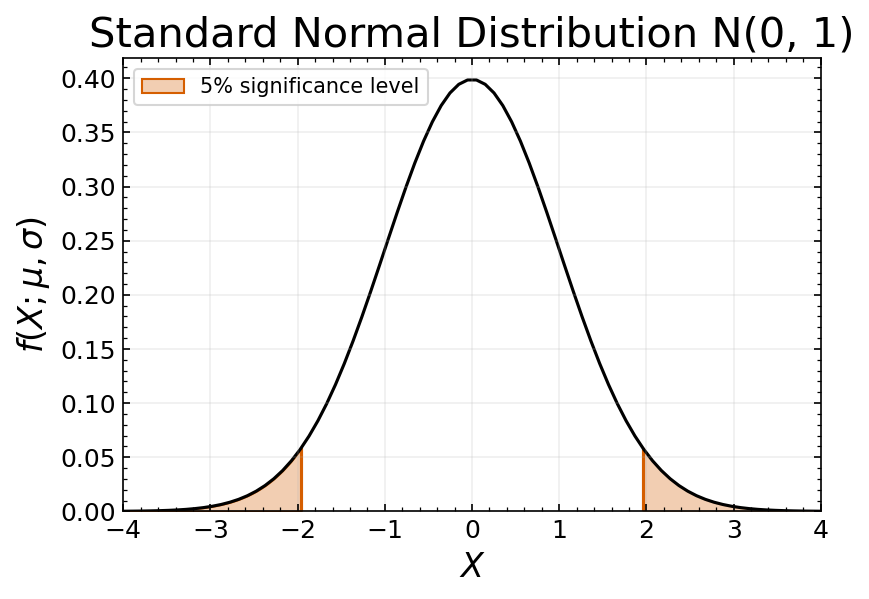

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator
from matplotlib.colors import to_rgba 

fig, ax = plt.subplots(1,1,figsize = (6,4),dpi = 150)
ax.plot(np.linspace(-5,5,100),norm.pdf(np.linspace(-5,5,100)),color='black', zorder = 1)
ax.set_ylim(bottom = 0)
ax.set_xlim(-4,4)
ax.set_xlabel('$X$',fontsize = 16)
ax.set_ylabel('$f(X; \mu, \sigma)$',fontsize = 16)
ax.tick_params(direction='in',top=True,right=True,which='both',labelsize =12)
ax.plot([interval[0],interval[0]],[0,norm.pdf(interval[0])-0.001],color='#D55E00',zorder = 0)
ax.plot([interval[1],interval[1]],[0,norm.pdf(interval[1])-0.001],color='#D55E00',zorder = 0)
ax.fill_between(np.linspace(-5,interval[0],100),np.repeat(0,100),norm.pdf(np.linspace(-5,interval[0],100)),zorder = 0,fc=to_rgba('#D55E00',0.3),edgecolor = '#D55E00',label='5% significance level')
ax.fill_between(np.linspace(interval[1],5,100),np.repeat(0,100),norm.pdf(np.linspace(interval[1],5,100)),zorder = 0,color='#D55E00',alpha = 0.3)
ax.xaxis.set_minor_locator(MultipleLocator(0.2))
ax.yaxis.set_minor_locator(MultipleLocator(0.01))
ax.legend(loc='upper left')
ax.set_title('Standard Normal Distribution N(0, 1)',fontsize = 20)
ax.grid('xkcd:dark blue',alpha = 0.2)

## Test statistics 

So far we have only discussed random variables as things we can measure directly - like the $X$ from a normal distribution or the $k$ from a Binomial distribution. However, what if our measurement consists of lots of data - after all the world today is all about **Big** data right?

We can extend the concepts we have been discussing to a **test-statistic**. A test-statistic is a function of our entire data that yields (usually) a single number. Sometimes this is called a **summary** statistic because it aims to summarise our data. A classic example would be to use the sample mean of a data set $\bar{X}=\frac{1}{N}\sum_{i=1}^{N}X_{i}$ as a summary of a data set $X_{i}$. In the following, we will look at two very common test-statistics used in experimental science and machine learning, the $\chi^{2}$ test-statistic and the Kolmogorov-Smirnov (KS) test-statistic.

In general, we still need to define the value of $\alpha$ and choose a critical region, however this time, we need to know the PDF for our test-statistic. In some cases, there will be a known answer for the PDF, but often you will need to use Monte Carlo methods to estimate it. 

## The $\chi^2$ goodness of fit test

The $\chi^2$ test statistic is used in (probably) the best known hypothesis test, and is commonly used to check the "goodness of fit" for a model to data. 

Formally, for a set of $N_\text{data}$ measurements $\{X_i,y_i\}$ (**independent variable** $X_i$ controlled by us while the **dependent variable** $y_i$ is the output we measure) and some function $f(X)$. We want to work out if the function $f(X)$ models the data well. We don't expect the agreement to be perfect if this is the case, but we do expect that any deviations in the data from what our fit function $f$ predicts can be understood as expected statistical noise. 

To calculate the $\chi^2$, we first must calculate the **residual** of each point, which is the difference between the data $y_i$ and the prediction at the same point $f(X_i)$, weighted by the uncertainty $\sigma_i$ on the measurement $y_i$. This is written as:

\begin{equation*}
p_i = \frac{y_i - f(X_i)}{\sigma_i},
\end{equation*}

where $p_i$ is the residual for the $i$-th data point. 

We can then define the $\chi^2$ test statistic given the measurements $y_i$, as the sum of the square of the residuals:

\begin{equation*}
\chi^2(y_i) = \sum_i p_i^2 = \sum_i \frac{(y_i - f(X_i))^2}{(\sigma_i)^2},
\end{equation*}

We can identify the null hypothesis ($H_0$) as the hypothesis that $f(X)$ describes the data well. 

We will first make one key assumption: that if our fit is a good fit, the $y_i$ are random variables distributed according to a normal distribution $N(f(X_i),\sigma_i)$ i.e. with mean $f(X_i)$ and standard deviation $\sigma_i$. The residuals $p_i$ are therefore standard normally distributed random variables. 

If we have a *good* fit, we expect the $y_i$ to deviate from the mean by values similar to $\sigma_i$, under this assumption of a normal distribution. We therefore expect the square of each residual $p_i^2 \sim 1$, so the $\chi^2$ value for a good fit should be $\sim N_\text{data}$ i.e. similar to the number of data points. This is in general a quick way to assess how well the data agrees with the model, but we can do better. 

<div style="background-color: #FFF8C6">

### Aside: Degrees of freedom and $\chi_\nu^2$

Often, the $\chi^{2}$ test is performed **after** first fitting the function $f(X)$ to the data. This means that the function should really be thought of as $f(X;\boldsymbol{\theta})$ where $\boldsymbol{\theta}$ are parameters to be determined first by fitting to the data. 

In practice, rather than comparing the noise in the results to that expected from $N_\text{data}$ Gaussians, we actually need to compare to the number of **degrees of freedom** $N_\text{dof}$, which is the difference between the number of data points $N_\text{data}$ and the number of fit parameters $N_\text{params}$:

\begin{equation*}
N_\text{dof} = N_\text{data} - N_\text{params}
\end{equation*}

This is because we can think of each measurement $y_i$ as giving us an equation for $f(X_i;\boldsymbol{\theta},\sigma_i)$. So at the very least if we have $N_\text{params}$ parameters to fix we will need $N_\text{params}$ pieces of information $y_i$ to fix them. For $N_\text{dof} < 0$, the system is underconstrained and cannot be uniquely solved. 

In general we have many more data points than parameters $N_\text{dof} >0$ and a fit is needed to find the best of many possible solutions. However, even in this case, we can think of the $N_\text{params}$ parameters chosen as giving us $N_\text{params}$ equations limiting the data so really only $N_\text{dof} = N_\text{data} - N_\text{params}$ peices of information are unconstrained and so these remaining measurements can have some random noise (assumed Gaussian in this context).  So when we are trying to estimate if the data shows a reasonable amount of randomness, we need to think of the noise as coming from $N_\text{dof}$ variables, in this case normal distributed. 

This is why it is useful to define what is called the **reduced chi-square statistic** $\chi_\nu^2$
$$
\chi^2_\nu = \frac{\chi^2}{N_\text{dof}}
$$
which is the $\chi^2$ per degree of freedom. Our naive estimate for $\chi^2$ suggests that this reduced chi-square statistic $\chi^2_\nu$ should *always* be around $1.0$. In more detail:-
 
* If $\chi_\nu^2$ is around 1.0 then we may have a good fit.
<br>
<br>    
* For values of $\chi_\nu^2$ much greater than 1, average deviation is much greater than $1\sigma$:
    1. The chosen model could have too few parameters to model the data well; you could be **underfitting**.
    1. The choice of parameters $\boldsymbol{\theta}$ may not be correct even if the type of model is correct.
    1. The uncertainty on measurements $\sigma_i$ could be underestimated.
<br>
<br>
* For values of $\chi_\nu^2$ much less than 1, the average deviation is much less than $1\sigma$:
    1. The chosen model could have too many parameters for the data; you could be **overfitting**.
    1. The uncertainty on each data point could be overestimated.

Because there are multiple possible explanations for different values of the reduced $\chi^2$, you need to be careful how you interpret your results. Look at the optional note below on some of the common problems. 

<div style="background-color: #FFF8C6">

#### WARNING: Common problems when using $\chi^2$
    
The literature and even python library functions are often very confused about the correct general form of the $\chi^2$ statistic which is what we have defined carefully here.  
    
>The simple rule is that if you do not have explicit values for $\sigma_i$ in your numerical routine for $\chi^2$, one for every measurement $y_i$, then you are probably making assumptions which may well be wrong.
    
There are two common problems.
* The routine you are using will accept a list of $\sigma_i$ values but it also runs without them, setting default values of $\sigma_i=1$ if you don't give explicit vaues. This default just gives you a simple sum of square differences. This can be used for parameter estimation, but not generally for much else.
* Your $\chi^2$ routine does *not* have the option to provide any $\sigma_i$ values because it sets $(\sigma_i)^2=y_i$.  The reason for this is that the routine is assuming Poisson statistics where the mean is equal to the variance. This is appropriate when each measurement $y_i$ is a count and the count is reasonably large (say greater than 5 as a rough rule of thumb) so that the Poisson is a good approximation for a Binomial distribution (which is what we really have). For example $y_i$ could be the number of people in the Physics department who have heights $h$ in centimetres which fall in the range $10*(i) \leq h < 10*(i+1)$.  The form where $(\sigma_i)^2=y_i$ is known as the **Pearson chi-squared statistic** but it is often incorrectly referred to as *the* chi-squared statistic.
    
Even if you do have to give $\sigma_i$ values to your routine, make sure they are standard deviations for the actual values $y_i$. A common problem is if $y_i$ is some sort of average (e.g. over several repreated measuyrements) you use the standard deviation obtained from the set of measurements for $y_i$ not the standard error of the mean.
    
A simple check is to look at the reduced chi-square statistic $\chi_\nu^2$. If $\chi_\nu^2$ is ridiculously small or far too large given what you can see in the data, you have probably made a mistake. 
    


### The distribution of the $\chi^{2}$ test-statistic and the critical region

Rather confusingly (or perhaps to you it makes things clearer), the test-statistic that we call $\chi^{2}$ has a known distribution under the null hypothesis (i.e that $f(X)$ describes the data well), which is ... a $\chi^{2}$ distribution.

Ok, it's not that simple. In fact, the test-statistic is distributed as a $\chi^{2}_{N}$ distribution, where $N$ is the number of data points, **and** when $y_{i}$ are Gaussian distributed. 

Looking at the $\chi^{2}$ test-statistic itself, it should be rather clear that when the residuals are large, there is more disagreement between the data and the model, while smaller values indicate a closer agreement. We should therefore choose a critical region as the *largest values* of the test-statistic. In the example below, you can see where the critical region is for a $chi^{2}$ test statistic with $N=5$ and $\alpha=0.05$ 

Text(0, 0.5, 'f($\\chi^2$; 5)')

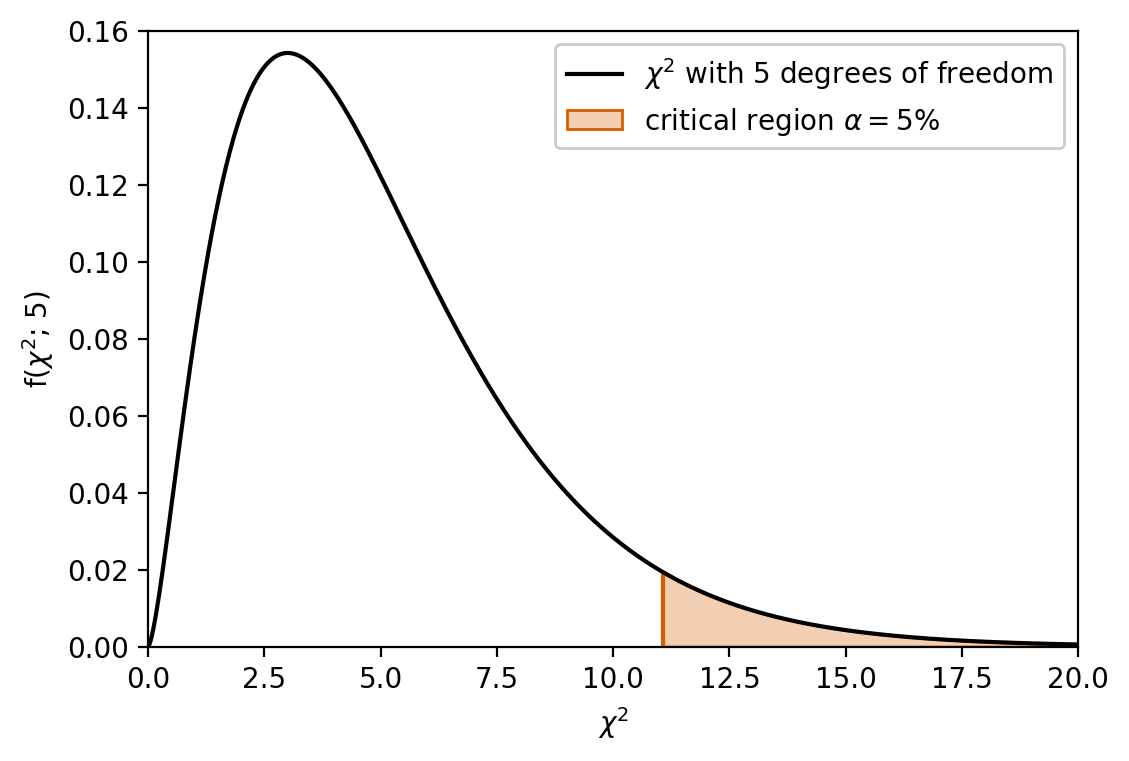

In [6]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import chi2 # This is the chi-square distribution, not the chi-square statistic
from matplotlib.colors import to_rgba

X = np.linspace(0,20,1000)
fig, ax = plt.subplots(1,1,figsize = (6,4),dpi = 200)
ax.plot(X, chi2.pdf(X, 5), label='$\\chi^2$ with 5 degrees of freedom',color='black',zorder = 1)
ax.plot([chi2.ppf(0.95,5),chi2.ppf(0.95,5)],[0,chi2.pdf(chi2.ppf(0.95,5),5)-0.001],zorder = 0,color='#D55E00')
ax.fill_between(np.linspace(chi2.ppf(0.95,5),25,1000),np.repeat(0,1000)
	,chi2.pdf(np.linspace(chi2.ppf(0.95,5),25,1000),5),fc=to_rgba('#D55E00',0.3)
	,label='critical region $\\alpha = 5$%',edgecolor='#D55E00',zorder = 0)
ax.set_ylim(bottom = 0, top = 0.16)
ax.set_xlim(0,20)
ax.legend(loc='upper right',framealpha = 1)
ax.set_xlabel('$\\chi^2$')
ax.set_ylabel('f($\\chi^2$; 5)')

For a given data set $(X_{i},y_{i})$, we would calculate the $\chi^{2}$ test statistic and check if it lies in the critical region or not. If it **does not**, we would be satisfied that $f(X)$ is a good description of the data. If it **does**, we would reject $f(X)$ as being a good model and probably hunt for a better one or find the reason why. 

Below are two examples of datasets, one which would lead to rejection of the function $f(X)$, and another which wouldn't. 

<img src='Week2_plots/chi2_example.png' align='center' width=1000>

*Two datasets presumably from the same function. The one on the left yields a $\chi^{2}$ value that would lead us to accept the model, while the right one has a value that would lead us to reject the hypothesis when $\alpha=0.05$*

### p-values

For test-statistics like the $\chi^{2}$, where the critical region lies in the tail of the distribution, a common way to evaluate whether or not the test-statistic is in the critical region is to calculate a p-value with respect to the null hypothesis.  

A **p-value** yields the probability $p$ of getting the observed value of some test-statistic $t$ or larger under some (typically the null hypothesis). The statistic value $t$ is calculated from the data. The probability distribution used to find $p$ is the distribution for the test statistic given that the data comes from null model, our null hypothesis $H_0$. 

If the the probability density distribution for the possible test statistic values is written as $p(t|H_0)$ (indicating this is the probability for $t$ assuming $H_0$ is true) and if larger $t$ values are worse, then the p-value is simply found from the CDF     
$$
p = P(t|H_0) = \int_t^\infty dt' \,  p(t'|H_0) \, .
$$

Note $p(t|H_0)$ is *not* the same as our PDF $f(X)$.  This distribution $p(t|H_0)$ needs to be derived from $f(X)$ and will change depending on the test statistic used. So more work needs to be done and this work is typically not trivial and often it is not even analytically tractable (although one can use Monte Carlo methods). 

Given the definition of $\alpha$, for test-statistics that have critical regions that are tail values, the test-statistic being in the critical region is exactly the same as finding $p<\alpha$. 


<div style="background-color: #FFF8C6">

#### Dire warning about p-values

These p-values are widely used in statistical analysis but they are often misunderstood, misused and abused. They are often produced by library functions and then reproduced without any thought, even in published academic papers. These p-values can carry meaning but don't simply accept them at face value; think about how they were obtained. 

Please come to the next discussion session, where we will learn more about what p-values are and are not.

#### Example

Consider a fit of some data to a given theory where we have $N_\text{dof}= 5$ and $\chi^2 = 7.64$. 

We start with a quick rough check and we see that the reduced chi-squared (to 2 d.p.) is 
$$\chi_\nu^2 = \chi^2 / N_\text{dof} = 7.64/5 = 1.53$$ 
This is reasonably close to $1.0$ so we might guess that the theory is is not a bad fit to the data.

To be more precise, if we choose a Type-I error rate ($\alpha$) of 5% and perform a hypothesis test, we can determine if we would reject the null hypothesis using the calculation of the p-value. 

We can calculate it using the function `chi2.sf` (sf = "survival function"), which is equivalent to 1 - `chi2.cdf`. Run the cell below to see how that works.

<>:8: SyntaxWarning: invalid escape sequence '\c'
<>:13: SyntaxWarning: invalid escape sequence '\c'
<>:14: SyntaxWarning: invalid escape sequence '\c'
<>:8: SyntaxWarning: invalid escape sequence '\c'
<>:13: SyntaxWarning: invalid escape sequence '\c'
<>:14: SyntaxWarning: invalid escape sequence '\c'
/var/folders/9c/l_hhhml95sz43s5rrrv28k5c0000gn/T/ipykernel_15179/1002155431.py:8: SyntaxWarning: invalid escape sequence '\c'
  ax.plot(X, chi2.pdf(X, 5), label='$\chi^2$ with 5 degrees of freedom',color='black',zorder = 1)
/var/folders/9c/l_hhhml95sz43s5rrrv28k5c0000gn/T/ipykernel_15179/1002155431.py:13: SyntaxWarning: invalid escape sequence '\c'
  ax.set_xlabel('$\chi^2$')
/var/folders/9c/l_hhhml95sz43s5rrrv28k5c0000gn/T/ipykernel_15179/1002155431.py:14: SyntaxWarning: invalid escape sequence '\c'
  ax.set_ylabel('f($\chi^2$; 5)')


0.17722382548124416


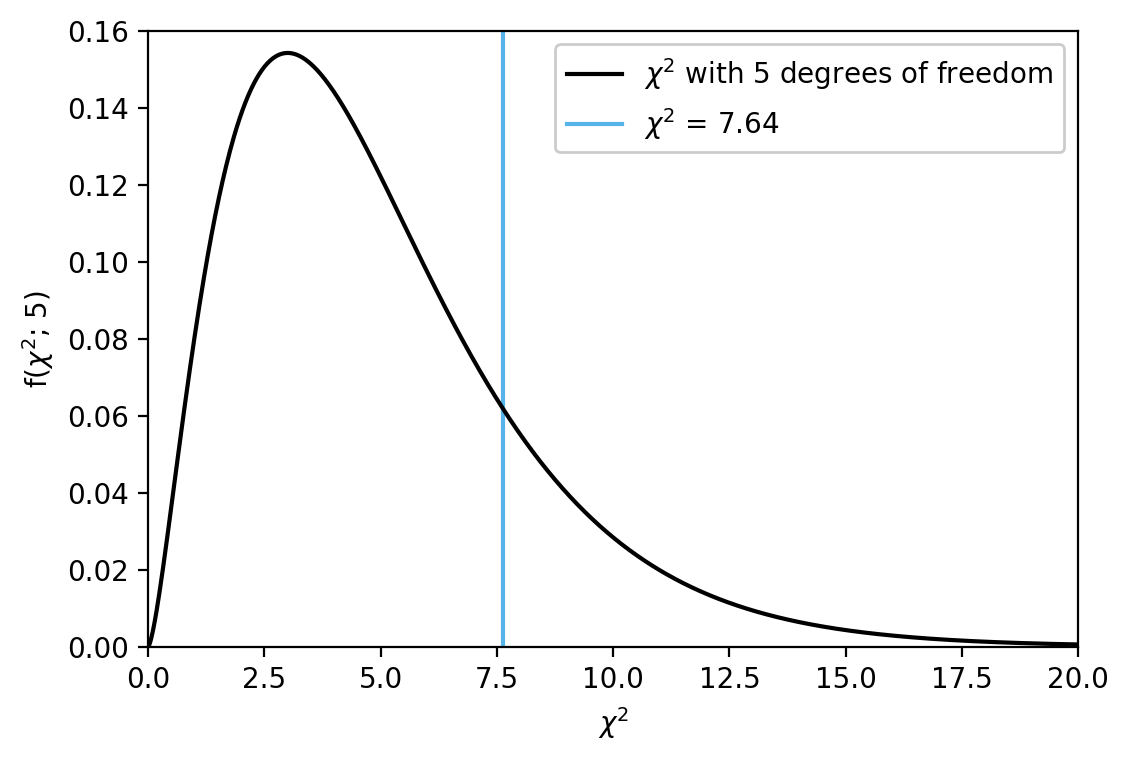

In [47]:
from scipy.stats import chi2 # This is the chi-square distribution, not the chi-square statistic
from matplotlib.colors import to_rgba

chi2_value = 7.64

X = np.linspace(0,20,1000)
fig, ax = plt.subplots(1,1,figsize = (6,4),dpi = 200)
ax.plot(X, chi2.pdf(X, 5), label='$\chi^2$ with 5 degrees of freedom',color='black',zorder = 1)
ax.plot([chi2_value, chi2_value],[0,0.17],color='#56B4E9',zorder = 0,label=r'$\chi^2$ = {:4.2f}'.format(chi2_value))
ax.set_ylim(bottom = 0, top = 0.16)
ax.set_xlim(0,20)
ax.legend(loc='upper right',framealpha = 1)
ax.set_xlabel('$\chi^2$')
ax.set_ylabel('f($\chi^2$; 5)')

print(chi2.sf(chi2_value,5))

## Kolmogorov-Smirnov tests

Named after Andrey Kolmogorov and Nikolai Smirnov, the Kolmogorov-Smirnov test, often just the K-S test or the KS test, is one of the most common goodness of fit tests. It is used in two ways.

The **one-sample** KS test compares a data sample with a reference probablity distribution. The question this test asks is
* how likely is it that we would see these data samples if the data is drawn from that probability distribution?

The **two-sample** KS test compares two different data samples. This test asks
* how likely is it that we would see these two sets of data samples if they are drawn from the same (but unknown) probability distribution?

The KS test is based around the CDF (cumulative probability distribution) not the PDF (probability density function). So to test empirical data, we first need to define the the **empirical cumulative distribution** of the data $F_{\text{data}}(X)$. This is defined as follows:

\begin{equation*}
F_{\text{data}}(X) = \frac{\text{number of data values} < X}{n},
\end{equation*}
where $n$ is the number of measurements in the dataset. 

We will describe the KS tests in terms of the following simple model. Consider the standard normal distribution $N(0, 1)$. We can generate random samples from this dataset using `scipy.stats`.

We start by finding the empirical cumulative distribution for our data.

In [3]:
# This code cell creates the data
from scipy.stats import norm
import numpy as np

# Set the random seed for consistency. scipy.stats uses the numpy random number generator, so why not use 0?
np.random.seed(0) 


number_values = 50 # this is the number of data values to use 
samples = norm.rvs(loc=0.0, scale=1.0, size = number_values) # the mean is loc=0, the standard deviation is scale=1.0

def Fd(X):
    """ This gives the empirical cumulative distribution of the data in "samples" for given X value """
    return np.count_nonzero(samples<X)/len(samples)

# Values of X to use here when plotting
Xmin=-3.0
Xmax=3.0
Xvalues = np.linspace(Xmin, Xmax, number_values*2) 

empirical = [Fd(X) for X in Xvalues] # This gives the  empirical cumulative distribution for many values of X


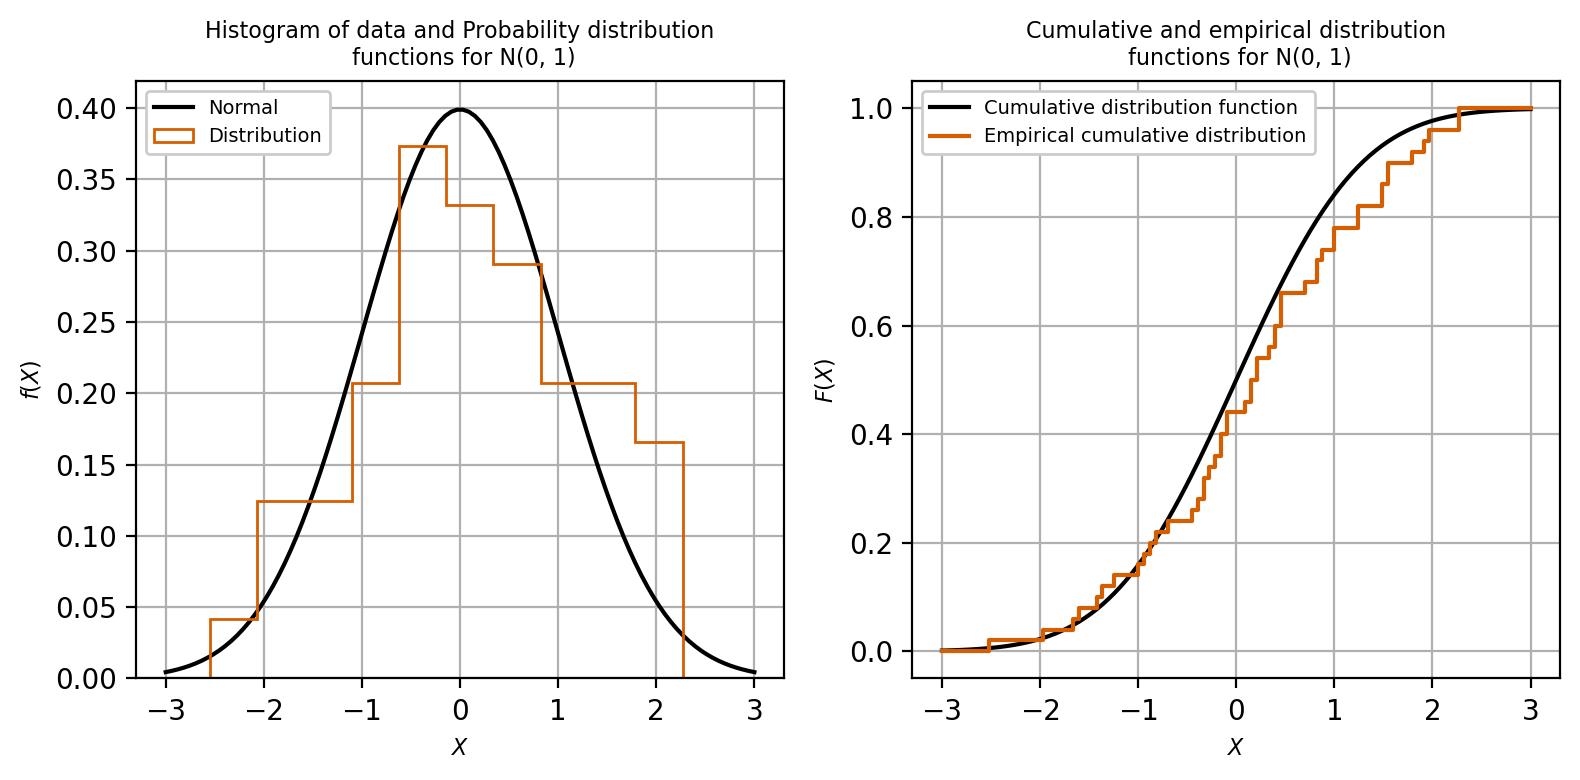

In [23]:
# This code cell plots empirical cumulative distribution from our data with the theoretical CDF
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2,figsize = (8,4),dpi = 200)

ax[0].plot(Xvalues,norm.pdf(Xvalues),color='black', label = 'Normal')
ax[0].hist(samples,histtype='step',color='#D55E00',label='Distribution',density=True)
ax[0].legend(loc='upper left',framealpha = 1,fontsize = 7)
ax[0].set_xlabel('$X$',fontsize = 8)
ax[0].set_ylabel('$f(X)$',fontsize =8)
ax[0].grid()
ax[0].set_title('Histogram of data and Probability distribution\n functions for N(0, 1)',fontsize = 8)

ax[1].plot(Xvalues,norm.cdf(Xvalues),color='black', label = 'Cumulative distribution function')
ax[1].step(Xvalues,empirical,color='#D55E00',label='Empirical cumulative distribution',where='post')
ax[1].legend(loc='upper left',framealpha = 1,fontsize = 7)
ax[1].set_xlabel('$X$',fontsize = 8)
ax[1].set_ylabel('$F(X)$',fontsize =8)
ax[1].grid()
ax[1].set_title('Cumulative and empirical distribution\n functions for N(0, 1)',fontsize = 8)

plt.tight_layout()

As you can see, while the empirical distribution is close to the cumulative distribution it does vary. If we increase the amount of data, the empirical distribution will get closer to the true cumulative distribution function. In fact, in general the Kolmogorov-Smirnov test performs best for large amounts of data, because then the empirical distribution better approximates the true distribution that describes the data, regardless of whether that is the same as the distribution you are comparing to or not. 

#### One-sample KS test

For the one-sample test, we then wish to compute the maximum absolute distance between the empirical cumulative distribution $F_\text{data}(X)$ and the cumulative distribution function $G(X)$. This can be written as

\begin{equation*}
D = \max_X |F_\text{data}(X) - G(X)|,
\end{equation*}
where $\max_X$ means that we take the largest value of $|F_\text{data}(X) - G(X)|$ over all values of $X$ in the empirical data set. 

In general, larger values of $D$ indicate worse agreement between the CDFs. We can calculate this for our standard normal data:

In [ ]:
samples_cumulative = [Fd(X) for X in samples]

D = np.max(np.abs(samples_cumulative - norm.cdf(samples)))

print(D)

0.10706475374815838


<div style="background-color:#C2F5DD">

We can all try to change the random number seed above (e.g. try the last three digits of your CID number) and repeat to see what difference it makes. I found $D \approx 0.107$ for seed zero on my machine but the same seed on different machines may generate different answers.

So far we have generated empirical data from the distribution we are examining so the data will be a good fit to the theoretical distribution. 

Let us try instead generating data from a uniform distribution between -3 and 3, denoted $U(-3,3)$, and comparing the distribution of the data with the standard normal distribution.

0.2888930670341085


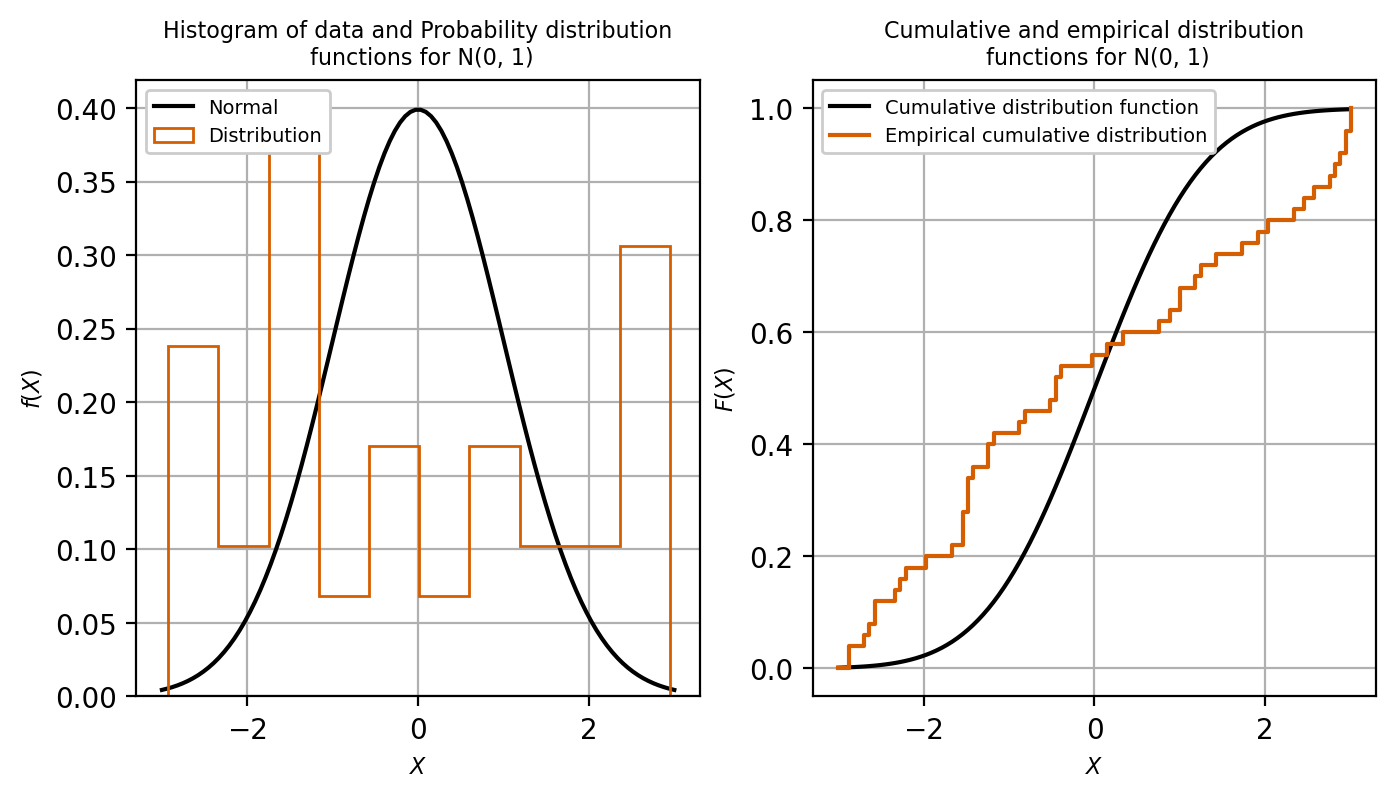

In [13]:
# Now repeat analysis above but for uniform distribution, all combined into this one cell.
from scipy.stats import uniform

# Number of X values and the values of X are set above Xvalues = np.linspace(Xmin, Xmax, number_values*2) etc
# number_values=50, Xmin=-3.0, Xmax=3.0, Xvalues = np.linspace(Xmin, Xmax, number_values*2) 
uniform_samples = uniform.rvs(loc = Xmin, scale = Xmax-Xmin, size = number_values)

def Fd_uniform(X):
    return np.count_nonzero(uniform_samples < X)/len(uniform_samples)

empirical_uniform = [Fd_uniform(X) for X in Xvalues]

fig, ax = plt.subplots(1,2,figsize = (8,4),dpi = 200)

ax[0].plot(Xvalues,norm.pdf(Xvalues),color='black', label = 'Normal')
ax[0].hist(uniform_samples,histtype='step',color='#D55E00',label='Distribution',density=True)
ax[0].legend(loc='upper left',framealpha = 1,fontsize = 7)
ax[0].set_xlabel('$X$',fontsize = 8)
ax[0].set_ylabel('$f(X)$',fontsize =8)
ax[0].grid()
ax[0].set_title('Histogram of data and Probability distribution\n functions for N(0, 1)',fontsize = 8)

ax[1].plot(Xvalues,norm.cdf(Xvalues),color='black', label = 'Cumulative distribution function')
ax[1].step(Xvalues,empirical_uniform,color='#D55E00',label='Empirical cumulative distribution',where='post')
ax[1].legend(loc='upper left',framealpha = 1,fontsize = 7)
ax[1].set_xlabel('$X$',fontsize = 8)
ax[1].set_ylabel('$F(X)$',fontsize =8)
ax[1].grid()
ax[1].set_title('Cumulative and empirical distribution\n functions for N(0, 1)',fontsize = 8)

uniform_samples_cumulative = [Fd_uniform(X) for X in uniform_samples]
D_uniform = np.max(np.abs(uniform_samples_cumulative - norm.cdf(uniform_samples)))
print(D_uniform)


We can see that the value for $D$ in this case is significantly larger than for data generated according to the standard normal distribution.  

How do we decide what value for $D$ indicates a good fit? We will see later how to do this formally.

<div style="background-color:#C2F5DD">
    
A rather quick and dirty way to do this is to change the seed and rerun the code to see how much the $D$ values change.  Do this once and see if you think that the data from a uniform distribution will always be significantly worse fit than the data from a standard normal distribution to the theoretical normal distribution. 

So far we have written our own code to do the KS test.  It wasn't too hard. However, trying to work out in a more rigorous way what the $D$ values mean is much harder.  Of course all this work has been done for us. 

In fact, the one-sample Kolmogorov-Smirnov test is implemented in `scipy.stats` as `ks_1samp`. We can use it as follows:

In [14]:
from scipy.stats import ks_1samp

d1_D, d1_p = ks_1samp(samples, norm.cdf)
unif_D,unif_p = ks_1samp(uniform_samples, norm.cdf)

print("For sample from normal distribution:  D = {:.3f} and p-value = {}".format(d1_D,d1_p))
print("For sample from uniform distribution: D = {:.3f} and p-value = {}".format(unif_D,unif_p))

For sample from normal distribution:  D = 0.107 and p-value = 0.5781417630622738
For sample from uniform distribution: D = 0.309 and p-value = 9.819892708502839e-05


This returns not only the value of $D$, but also the p-value of the test (like we have seen for hypothesis testing). We will see how we can calculate p-values ourself for Kolmogorov-Smirnov tests later. We can clearly see that the normally distributed sample is much more likely to belong to the hypothesised distribution than the uniformly distributed sample (as we expected).

#### Two-sample KS test

For a two-sample Kolmogorov-Smirnov test, rather than comparing empirical data with a well-defined distribution, we are comparing two different sets of empirical data. In this case, we need to compute the empirical cumulative distribution for both datasets. This is particularly useful in machine learning, to help evaluate performance of your model; you can try prediction on some of your training data, and compare the predicted values with some test data. You will see more of these concepts later in this course.

Here we will denote the empirical cumulative distributions for the two samples as $F_\text{data}(X)$ and $G_\text{data}(X)$ respectively. This test will allow us to determine if the two different empirical datasets are from the same underlying distribution. The distance $D_2$ is calculated according to

\begin{equation*}
D_2 = \text{sup}_X|F_\text{data}(X) - G_\text{data}(X)|.
\end{equation*}
where symbols have the same meanings as before. Once again, larger values of $D_2$ indicate greater disagreement between the two distributions. We can see this by comparing some normally distributed data with either more normally distributed data, or uniformly distributed data:

Text(0.5, 1.0, 'Empirical distribution\n functions')

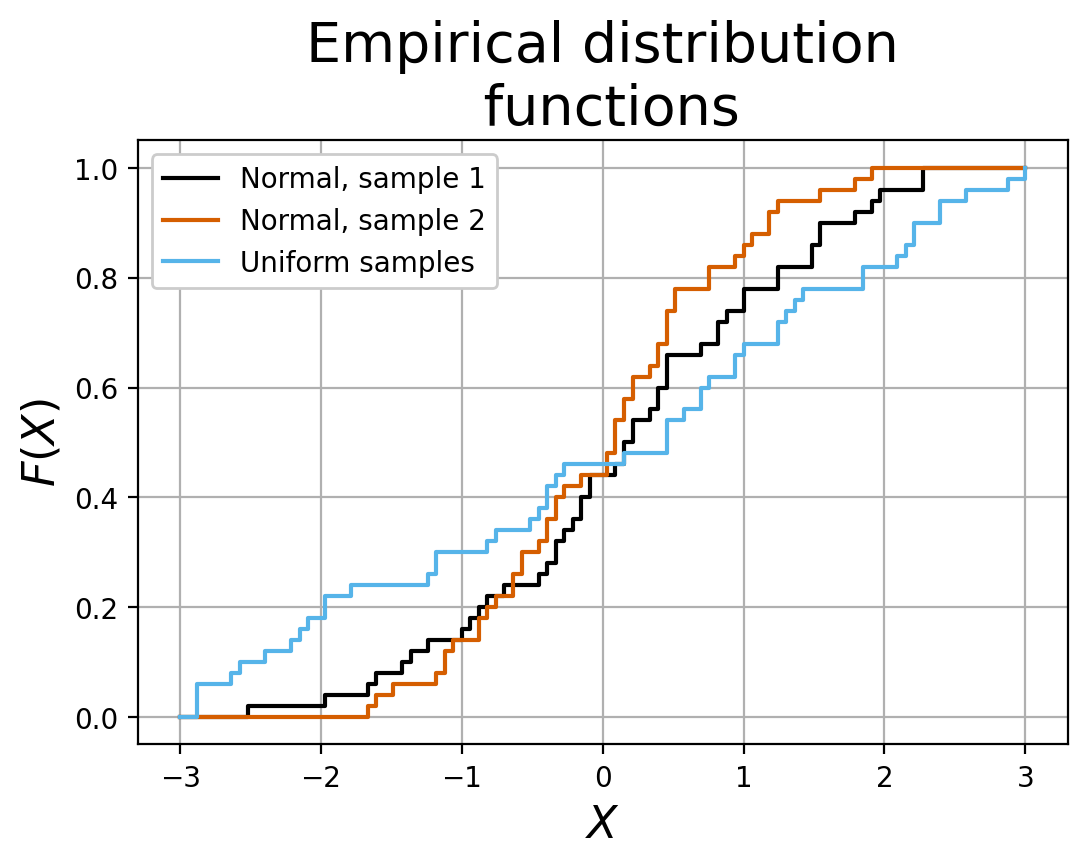

In [ ]:
np.random.seed(0) # Set the random seed for consistency

# Number of X values and the values of X are set above as number_values, Xmin, Xmax, Xvalues etc
# number_values=50, Xmin=-3.0, Xmax=3.0, Xvalues = np.linspace(Xmin, Xmax, number_values*2) 
samples_normal_1 = norm.rvs(size = number_values)
samples_normal_2 = norm.rvs(size = number_values)
samples_uniform = uniform.rvs(loc=Xmin, scale=Xmax-Xmin,size = number_values)

def Fd_normal_1(X):
    return np.count_nonzero(samples_normal_1 < X)/len(samples_normal_1)

def Fd_normal_2(X):
    return np.count_nonzero(samples_normal_2 < X)/len(samples_normal_2)

def Fd_uniform(X):
    return np.count_nonzero(samples_uniform  < X)/len(samples_uniform)

empirical_normal_1 = [Fd_normal_1(X) for X in Xvalues]
empirical_normal_2 = [Fd_normal_2(X) for X in Xvalues]
empirical_uniform  = [Fd_uniform(X)  for X in Xvalues]

fig, ax = plt.subplots(1,1,figsize = (6,4),dpi = 200)
ax.step(Xvalues, empirical_normal_1, color='black',   label = 'Normal, sample 1', where='post')
ax.step(Xvalues, empirical_normal_2, color='#D55E00', label = 'Normal, sample 2', where='post')
ax.step(Xvalues, empirical_uniform,  color='#56B4E9', label = 'Uniform samples',  where='post')

ax.legend(loc='upper left',framealpha = 1)
ax.set_xlabel('$X$',fontsize = 16)
ax.set_ylabel('$F(X)$',fontsize =16)
ax.grid()
ax.set_title('Empirical distribution\n functions',fontsize = 20)

To evaluate the Kolmogorov-Smirnov statistic for the two sample case, we should evaluate each CDF at each point in both sets of samples. 

In [ ]:
# The next two lists give the X values where there is data from either one of the two data sets being tested.
all_samples_normal  = np.concatenate([samples_normal_1, samples_normal_2])
all_samples_uniform = np.concatenate([samples_normal_1, samples_uniform])
all_samples_uniform2= np.concatenate([samples_normal_2, samples_uniform])

D_normal  = np.max(np.abs(np.array([Fd_normal_1(X) for X in all_samples_normal])   - np.array([Fd_normal_2(X) for X in all_samples_normal])))
D_uniform = np.max(np.abs(np.array([Fd_normal_1(X) for X in all_samples_uniform])  - np.array([Fd_uniform(X)  for X in all_samples_uniform])))
D_uniform2= np.max(np.abs(np.array([Fd_normal_2(X) for X in all_samples_uniform2]) - np.array([Fd_uniform(X)  for X in all_samples_uniform2])))

print("Comparing normal sample 1 and normal sample 2: D = {}".format(D_normal))
print("Comparing normal sample 1 and uniform sample:  D = {}".format(D_uniform))
print("Comparing normal sample 2 and uniform sample:  D = {}".format(D_uniform2))

Comparing normal sample 1 and normal sample 2: D = 0.14
Comparing normal sample 1 and uniform sample:  D = 0.19999999999999998
Comparing normal sample 2 and uniform sample:  D = 0.24


Clearly, the agreement is much better between normal sample 1 and normal sample 2 than between normal sample 1 and the uniform sample (as you would expect).

Once again, the 2-sample KS test is implemented in `scipy.stats` as `ks_2samp`. Again, this also returns the p-value of the test, which we will discuss later.

In [ ]:
from scipy.stats import ks_2samp

print('Comparison of normal 1 and normal 2: D = {}, p-value = {}'.format(*ks_2samp(samples_normal_1, samples_normal_2)))
print('Comparison of normal 1 and uniform : D = {}, p-value = {}'.format(*ks_2samp(samples_normal_1, samples_uniform)))
print('Comparison of normal 2 and uniform : D = {}, p-value = {}'.format(*ks_2samp(samples_normal_2, samples_uniform)))

Comparison of normal 1 and normal 2: D = 0.14, p-value = 0.7166468440414822
Comparison of normal 1 and uniform : D = 0.2, p-value = 0.2719135601522248
Comparison of normal 2 and uniform : D = 0.24, p-value = 0.11238524845512393


## Calculating p-values from Kolmogorov-Smirnov scores



Much like we have calculated p-values from $\chi^2$ values, we can do the same for Kolmogorov-Smirnov tests. We need to do this slightly differently for either one-sample or two-sample tests.

We will first setup up some common formalism between both problems. Let us denote the true cumulative distribution of the data as $F(X)$, and the other cumulative distribution is $G(X)$. This $G(X)$ which can either be the analytic distribution we are testing against for a one-sample Kolmogorov-Smirnov test, or the true distribution of the second sample we are testing against for a two-sample Kolmogorov-Smirnov test. 

We can look at performing either a one-sided or a two-sided hypothesis test on the Kolmogorov-Smirnov statistic. These correlate to different null and alternate hypotheses:

* Two-sided test: Null hypothesis is $F(X) = G(X)$; alternate hypothesis is $F(X) \neq G(X)$
<br>

* One-sided test: there are two possible tests:
    1. Null hypothesis: $F(X) \geq G(X)$ for all $X$; alternate hypothesis $F(X) \lt G(X)$ for at least one value of $X$
    1. Null hypothesis: $F(X) \leq G(X)$ for all $X$; alternate hypothesis $F(X) \gt G(X)$ for at least one value of $X$


<div style="background-color:#FFCCCB">

The choice of specific hypothesis test also slightly changes our choice of test statistic; for example, if we are only interested in testing the null hypothesis that $F(X) \geq G(X)$, we don't care about any cases where $F(X) \gt G(X)$ and instead the points that influence our test the most are the points where $F(X) \lt G(X)$. As a result, we can define two other test statistics. As before, $F_{\text{data}}(X)$ denotes the cumulative distribution function of data sampled from some probability distribution with true CDF $F(X)$.  

\begin{align*}
D_+ &= \text{sup}_X(F_{\text{data}}(X) - G(X)) \\
D_- &= \text{sup}_X(G(X) - F_{\text{data}}(X)),
\end{align*}
where these statistics are written for the one-sample case but are defined equivalently for the two-sample case, just replacing $G(X)$ with $G_\text{data}(X)$. 

The two-sided test statistic $D$ can then be seen as $\text{max}(D_+, D_-)$.

### P-values for one-sample Kolomogorov-Smirnov tests

The one-sample Kolmogorov-Smirnov test aims to determine if a set of experimentally measured data $\{X_i\}$ is distributed according to some probability distribution $f(X)$ with corresponding CDF $F(X)$. Depending on our choice of a one-sided or two-sided test, the null hypothesis may vary but typically is that the data *is* distributed according to the probability distribution $f(X)$.

We will consider a set of data $\{X_i\}$ and find the $D$ value, the largest absoluted difference between $X_i$ and the correpsonding $f(X_i)$. We want to calculate the probability that this value is consistent with the probability distribution for the $X$, that is $f(X)$. 

If the null hypothesis is true, we expect $D$ to be a random variable distributed according to the Kolmogorov-Smirnov distribution. This distribution depends on the number of measurements we had but it has a horrible functional form that we will not present here, but it is implemented well in `scipy.stats` for both one-sided and two-sided tests, as `scipy.stats.ksone` and `scipy.stats.kstwo` respectively.

First, we will calculate the p-value for a two-sided test for a sample generated from a standard normal distribution, the $\{X_i\}$, and we compare this to the standard normal distribution itself, the $f(X)$. 

In [ ]:
from scipy.stats import norm, kstwo
np.random.seed(0) # Set the random seed for consistency

samples = norm.rvs(loc = 0, scale = 1, size = 50) # Generate the sample data we wish to test

xi_cumulative = [np.count_nonzero(samples < X)/len(samples) for X in samples] # Calculate empirical cumulative distribution

D = np.max(np.abs(xi_cumulative - norm.cdf(samples,loc = 0, scale = 1))) # Calculate D

p_value = kstwo.sf(D,len(samples))

print("D = {:.3f}, p-value = {}".format(D,p_value))


D = 0.107, p-value = 0.5781417630622738


Of course, as this is a common task, there is a single command that will do this for us. So we can compare the value we calculate step by step above with one we find using `scipy.stats.kstest`, which is a function that can be used for both one-sample and two-sample Kolmogorov-Smirnov tests. 

In [ ]:
from scipy.stats import kstest
#kstest(samples, norm.cdf)
ks_result = kstest(samples, norm.cdf)
print("Now D = {:.3f}, p-value = {}".format(ks_result.statistic,ks_result.pvalue))
print("Slight difference in p-value = {}".format(p_value-ks_result.pvalue))

Now D = 0.107, p-value = 0.5781417630622738
Slight difference in p-value = 0.0


<div style="background-color:#FFCCCB">

Note: it is possible that you might see some slight discrepancies between these values. This is because the implementation in `scipy` treats the empirical cumulative distribution differently for $D_+$ and $D_-$, the reason for which is beyond the scope of this course. For high sample sizes, these results will converge. In practise you should use the `scipy` implementation rather than coding a method yourself. 

We can set values of $\alpha$ for Kolmogorov-Smirnov values much like we can in any hypothesis test. For example, if we chose a 5% significance level ($\alpha=0.05$) for the data we have just computed the statistic for, we would accept the null hypothesis that the data is distributed according to the normal distribution.

Of course, this is *not* the right order in which to do things since we always need to choose the value of $\alpha$, before we run the test!

We can also calculate the statistic and the p-value for an empirical dataset that should not agree with the normal distribution. We will as before generate data corresponding to a uniform distribution between -3 and 3, denoted $U(-3,3)$.

In [ ]:
np.random.seed(0) # Set the random seed for consistency

u_samples = uniform.rvs(loc = -3, scale = 6, size = 50) # Now data is from the uniform distribution

u_cumulative = [np.count_nonzero(u_samples < X)/len(u_samples) for X in u_samples]

D_u = np.max(np.abs(u_cumulative - norm.cdf(u_samples, loc = 0, scale = 1)))

p_value_u = kstwo.sf(D_u,len(u_samples))

print("D = {:.3f}, p-value = {}".format(D_u,p_value_u))

D = 0.211, p-value = 0.019511592180535664


For this empirical dataset, we would therefore reject the null hypothesis that the data is distributed according to the uniform distribution at the 5% significance level.

### P-values for two-sample Kolmogorov-Smirnov tests

While in the one-sample case we can compare our value of $D$ to the Kolmogorov-Smirnov distribution, in the two-sample case things are a bit more complicated and the K-S distribution is not a good approximation until we reach very large sample sizes. Instead, we must rely on a method called the *inside method*. This calculates the distribution of possible values of $D$ through combinatorics, and is beyond the scope of this course. It is well-implemented in `scipy` as the backend for `ks_2samp`. We can calculate the p-values for comparing our two normally distributed samples and one of those samples with a uniform sample:

In [ ]:
from scipy.stats import ks_2samp

print(ks_2samp(samples_normal_1, samples_normal_2))
print(ks_2samp(samples_normal_1,samples_uniform))

KstestResult(statistic=0.14, pvalue=0.7166468440414822, statistic_location=1.1787795711596507, statistic_sign=-1)
KstestResult(statistic=0.2, pvalue=0.2719135601522248, statistic_location=-1.8000208506215996, statistic_sign=-1)


We can see from the p-values that the two normally distributed samples are much more likely to be from the same distribution, whereas we could reject the hypothesis that the first normal sample and the uniform sample are from the same distribution at the 5% significance level.

## Summary


In this section, we have presented the basic concepts of hypothesis testing, including:

* Critical/Rejection regions and Type-I errors/significance levels
* One-sided and two-sided hypothesis tests
* Hypothesis tests of discrete distributions
* Basics of critical region determinations in `scipy`
* $\chi^{2}$ and K-S test-statistics
* P-values and how to calculate p-values from both K-S tests and chi-squared tests

In the following section, we will discuss the alternate hypothesis and the concept of the Power of a hypothesis test.

<hr style="border:2px solid gray">
<a id='section3'></a>

# The Alternate Hypothesis $H_1$ and Power

Originally, only the null hypothesis was used in significance testing, an approach pioneered by one of the most important statisticians [Ronald Fisher](https://en.wikipedia.org/wiki/Ronald_Fisher) in the 1920's. Essentially, what we have described so far is Fisher's approach. In the 1950's [Jerzy Neyman](https://en.wikipedia.org/wiki/Jerzy_Neyman) and [Egon Pearson](https://en.wikipedia.org/wiki/Egon_Pearson) (confusingly, the son of the one who invented the Pearson correlation coefficient) attempted to improve Fisher's approach and this led to the use of an explicit alternative hypothesis $H_1$.

In many situations it is important to have a well defined alternative to the null hypothesis as the "not $H_0$" theory/model is often not defined in a useful way. So in this more modern approach, we have a well defined **alternate hypothesis** $H_1$ for comparison with the null hypothesis $H_0$. 

One way to see how an alternative hypothesis makes a difference is to note that our rejection regions for the null hypothesis $H_0$ often  change significantly depending on our choice for the alternate hypothesis $H_1$. To see this consider the following process.

* Consider a random variable $X$
* Null hypothesis $H_0$: $X \sim f(X)$ for some probability distribution $f(X)$
* Alternate hypothesis $H_1$: $X \sim g(X)$ for some different probability distribution $g(X)$
* Make a measurement $X_m$ of the random variable $X$ that lies in a low PDF region for the null hypothesis
* Even if $f(X_m)$ is small, if $g(X_m)$ is *smaller* we say the null hypothesis is still still more believable than the alternate hypothesis, so we cannot reject the null hypothesis

As a result, we can see that any regions for which $g(X)$ is *smaller* than $f(X)$ should not be included in our critical region regardless of how probable the values of X are under the null hypothesis. In such regions, we have no reason to prefer the alternate hypothesis over the null hypothesis and so cannot reject the null hypothesis. 

Note: much like before, we *cannot* accept the alternate hypothesis under a hypothesis test, only decide whether we do or do not reject the null hypothesis. 

#### Example

For example, consider some potential new physics theory that predicts a some new signal in the measurement of $X$. 

* In the absence of this new theory, we expect $X$ to be distributed according to a standard Gaussian distribution centered at 0 and standard deviation $\sigma=1.0$. This will be our null hypothesis $H_0$ that the PDF for $X$ is the standard normal distribution $N(0,1)$. 
    * In particle physics experiments this would describe what is called the "background". 
    * In this case we could imagine this this peak represents the production of a known particle, say the Higgs. Hence $X= (E - m_\mathrm{Higgs})/\sigma_\mathrm{Higgs}$ where we used the mass and lifetime/width of the Higgs to rescale energy $E$ into dimensionaless $X$.
* On the other hand this new theory predicts $X$ distributed according to a Gaussian centered at 1 and standard deviation $\sigma=1.0$. This will be our alternative hypothesis $H(1)$ that the PDF for $X$ is $N(1,1)$. 
    * In particle physics experiments this would describe what is called the "background" but it would normally be a smooth distribution without a peak in a realistic case.
    *  have shifted energy axes to use the mass and deacy width of the set the energy to be zero  and we are looking to see if virtual particles (heavier particle predicted by supersymmetry perhaps)  
* For large positive values of $X$, we can safely reject the null hypothesis. The PDF for the alternative hypothesis $H_1$ is always greater than the null hypothesis for $X > 0.5$ so $H_1$ is always a better if sometimes a poor choice there.     
* However, if we measure a large negative value of $X$, although this is unlikely under the null hypothesis $H_0$, it is even less likely under the alternate hypothesis $H_1$ and so we cannot reject the null hypothesis.  
* As a result, we do *not* have a critical region for large negative values of $X$. 
* Instead, the size of the critical region at large positive values is *increased* to cover the total desired significance level $\alpha$ as compared to the previous example where we had only the null hypothesis.

Suppose we choose the same significance level of $\alpha=5$% as before.  The left plot shows the null hypothesis critical region without considering an alternate hypothesis, exactly as described in the previous example. However, the right shows the new critical region after we have considered the alternate hypothesis $H_1$ shown here. Clearly, the alternate hypothesis significantly alters our critical region. In particular, note that to get a 5% type-I error rate but only using the positive $X$ region, this positive critical region is not simply $X > 1.96$ as it was before and shown on the left. Now we find the positive critical region needs to be bigger, $X > 1.64$, as this is the only part of the critical region.

<img src='Week2_plots/alternate_hypothesis_example.png' align='center' width = 1000>

<div style="background-color: #FFF8C6">
    
#### Composite alternate hypotheses (Non-examinable)

While sometimes we may have a well defined PDF for our alternate hypothesis, this is not always the case. There are two main cases we can consider:

* In our signal-background example, we may not know the parameters of the signal distribution $H_1$ but we know that it should predict $X > 0$
    * As a result, know $H_0$ PDF is higher than $H_1$ PDF for $X \leq 0$
    * Use one-sided test

<br>


* Alternate hypothesis may be equally likely to shift value up or down
    * Have minimal information about alternate hypothesis, but as each direction is equally likely use a two-sided rejection region (as shown at first)
    * Effectively assuming a uniform distribution as the alternate hypothesis, to define the rejection region



### Type-II errors and Power of Hypothesis tests

In the previous example, it was obvious which critical region to choose to make it more likely to reject $H_{0}$ only when $H_{1}$ is true, but how can we figure this out for the general case?

We can introduce the concept of the **power** of a hypothesis test, defined as 

\begin{equation*}
1-\beta = \int_{\text{critical region}}g(X) \, dX
\end{equation*}

You can see this is the probability that we would reject the null hypothesis (that $X$ lies in the critical region) when the alternate hypothesis is true - this is what we want to do of course. The larger the power, the better!

With this in hand, we can also define a **type-II error rate**, which is the probability that we would **not** reject the null hypothesis when the alternate hypothesis is true - hopefully, you can see that this will be $\beta$. 

In modern hypothesis tests, we want to choose the critical region under two constraints, 

1. The value of the type-I error is equal to the desired value of $\alpha$ (for example 5%)
2. The power $1-\beta$ is as large as possible (or equivalently, the type-II error is as small as possible)


You will come across the concept of type-I and type-II errors when studying classification problems in machine learning (albeit with different names) so its very important that you understand these concepts now.

With any test, there will be a trade-off between the size of the critical region and the power of the test. Remember, we want a small Type-I error ($\alpha$) while maintaining a large power ($1-\beta$). 

Let's take a look at our Gaussian example, using the one-sided test. Run the cell below to create an interactive plot. Vary the value of $X_{r}$ that defines the critical region and see how $\alpha$ and $\beta$ vary. Their values are calculated as the shaded region under the black and orange curves respectively. In later lectures, you will see similar curves as the one created below - in the machine learning world, we call them ROC curves!

In [1]:
import ipywidgets
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator
from matplotlib.colors import to_rgba 

from scipy.stats import norm

mean_H1 = 1.5

xrange = np.linspace(-5,5,100)
beta   = norm.sf(xrange,mean_H1,1)
alpha  = norm.sf(xrange,0,1)  

def plot(Xr):

    fig, ax = plt.subplots(1,2,figsize = (8.8,4),dpi = 150)
    ax[0].plot(np.linspace(-5,5,100),norm.pdf(np.linspace(-5,5,100)),color='black', zorder = 1,label="$H_{0}$, $f(X)$")
    ax[0].plot(np.linspace(-5,5,100),norm.pdf(np.linspace(-5,5,100),mean_H1,1),color='orange', zorder = 2,label="$H_{1}$, $g(X)$")
    ax[0].set_ylim(bottom = 0)
    ax[0].set_xlim(-4,4)
    ax[0].set_xlabel('$X$',fontsize = 12)
    ax[0].set_ylabel('$f(X; \\mu, \\sigma)$',fontsize = 12)
    ax[0].tick_params(direction='in',top=True,right=True,which='both',labelsize =12)
    
    ax[0].fill_between(np.linspace(Xr,5,100),np.repeat(0,100),norm.pdf(np.linspace(Xr,5,100)),zorder = 0,color='gray',alpha = 0.3)
    ax[0].fill_between(np.linspace(Xr,5,100),np.repeat(0,100),norm.pdf(np.linspace(Xr,5,100),mean_H1,1),zorder = 0,color='#D55E00',alpha = 0.3)

    ax[0].xaxis.set_minor_locator(MultipleLocator(0.2))
    ax[0].yaxis.set_minor_locator(MultipleLocator(0.01))
    ax[0].axvline(x=Xr,color='black',linestyle='--',label='$X_r = $%.2f'%(Xr))

    ax[0].set_title('Standard Normal Distribution N(0, 1)',fontsize = 8)
    ax[0].grid('xkcd:dark blue',alpha = 0.2)

    ax[0].legend()

    ax[1].plot(alpha,beta,color='blue')
    ax[1].plot(norm.sf(Xr),norm.sf(Xr,mean_H1,1),color='black',linestyle='none',marker='o')
    ax[1].set_xlabel('$\\alpha$',fontsize = 12)
    ax[1].set_ylabel('$1-\\beta$',fontsize = 12)
    ax[1].grid('xkcd:dark blue',alpha = 0.2)

ipywidgets.interact(plot,Xr=(-4,4,0.1))

interactive(children=(FloatSlider(value=0.0, description='Xr', max=4.0, min=-4.0), Output()), _dom_classes=('w…

<function __main__.plot(Xr)>

### Example calculation of power of the K-S test

Let's go back to our one sample K-S test. We will choose a value of $\alpha=0.05$ and see how the power varies for different alternate hypotheses. 

Our null hypothesis will be the same as before, $H_{0}$ is a standard normal distribution, and the alternate distribution, $H_{1}$  will be a Gaussian distribution with varying mean. 

Let's assume the size of our data samples will be 100 events. What does the distribution of our test statistic $D$ look like under the null hypothesis? We can estimate the distribution using a Monte Carlo approach as follows, 

1. Generate a sample of 100 random variables from a standard normal distribution (ie under $H_{0}$) and calculate the test-statistic $D$.
2. Repeat step 1 many times and create a histogram of the values of $D$ for each sample. 

Let's do this in the code below

Text(0.5, 0, '$D$')

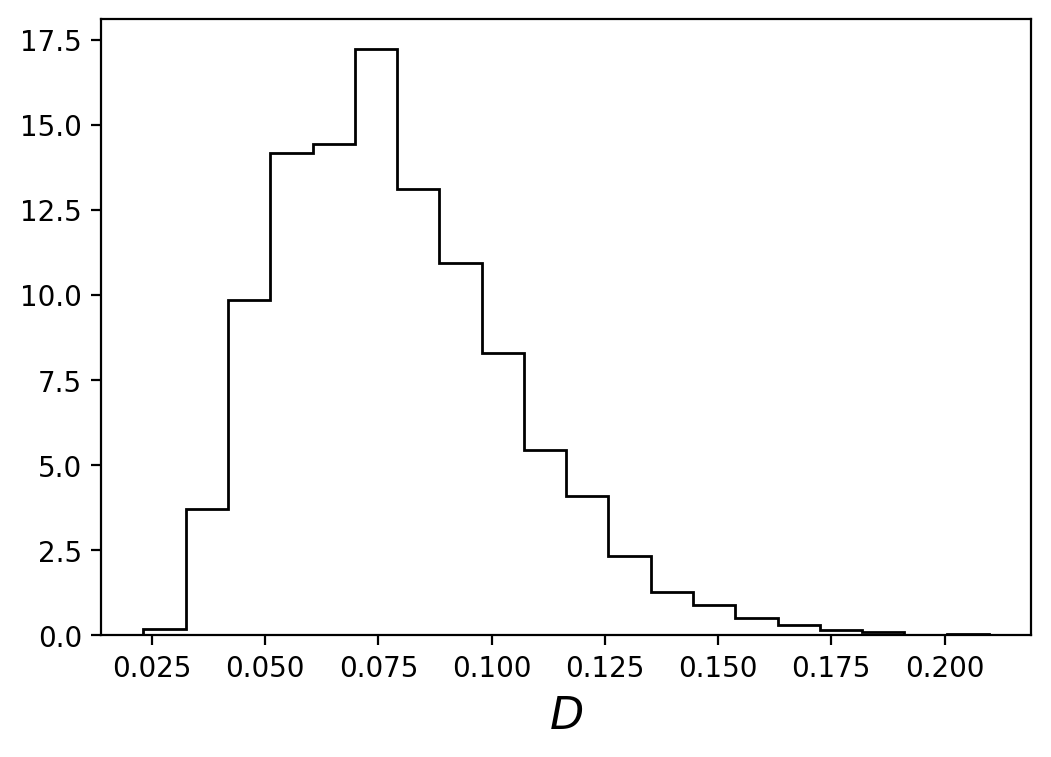

In [66]:
n_events = 100
n_samples = 10000

Xmin=-5.0
Xmax=5.0
Xvalues = np.linspace(Xmin, Xmax, 200) 

def Fd(X,samples):
    """ This gives the empirical cumulative distribution of the data in "samples" for given X value """
    return np.count_nonzero(samples<X)/len(samples)

def calc_D(samples):

    empirical = [Fd(X,samples) for X in Xvalues] 
    D = np.max(np.abs(empirical - norm.cdf(Xvalues)))
    return D

DvalsH0 = []

for i in range(n_samples):
    samples = norm.rvs(loc=0.0, scale=1.0, size = n_events)
    D = calc_D(samples)
    DvalsH0.append(D)

fig, ax = plt.subplots(1,1,figsize = (6,4),dpi = 200)
ax.hist(DvalsH0,bins=20,histtype='step',color='black',density=True)
ax.set_xlabel('$D$',fontsize = 16)

Let's assume our $H_{1}$ is also a Gaussian distribution with a standard deviation of 1 but with a mean of 0.2. We can add the distribution of $D$ under $H_{1}$ too!

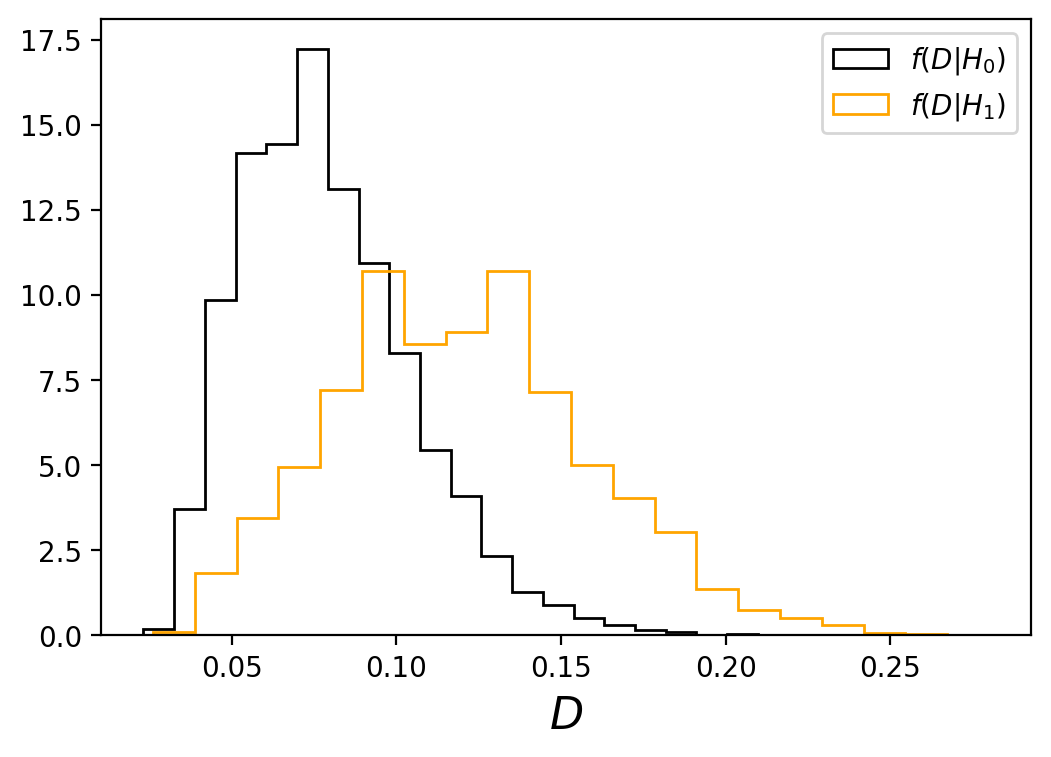

In [74]:
DvalsH1 = []
for i in range(n_samples):
    samples = norm.rvs(loc=0.2, scale=1.0, size = n_events)
    D = calc_D(samples)
    DvalsH1.append(D)

fig, ax = plt.subplots(1,1,figsize = (6,4),dpi = 200)
ax.hist(DvalsH0,bins=20,histtype='step',color='black',density=True,label='$f(D|H_{0})$')
ax.hist(DvalsH1,bins=20,histtype='step',color='orange',density=True,label='$f(D|H_{1})$')
ax.set_xlabel('$D$',fontsize = 16)

plt.legend()

If we choose the critical region to be $D>0.1$, we can use these distributions to estimate the Type-I error and the Type-II error rates since, 

Type-I error = $P(D>0.1|H_{0})$ 

Type-II error = $\beta=1-P(D>0.1|H_{1})$

In [70]:
print('Type-I error',np.count_nonzero(np.array(DvalsH0)>0.1)/n_samples)
print('Type-II error',np.count_nonzero(np.array(DvalsH1)<0.1)/n_samples)

Type-I error 0.1936
Type-II error 0.3178


In the figure below, we can see what the power of the K-S test looks like for different values for the mean of $H_{1}$ where the value of $\alpha$ is fixed at 0.05. 

<img src='Week2_plots/KSpower_example.jpg' align='center' width = 600>

## Summary


In this section, we have presented the concept of the power of a test, including:

* The alternate hypothesis $H_{1}$
* Type-I errors and the power of a test
* Comparing the power of the K-S test for different alternate hypotheses 

The following are the exercises for you to work through this week

<hr style="border:2px solid gray">
<a id='exercises'></a>

# Exercises [^](#outline)

<div style="background-color:#C2F5DD">

### Exercise 1

We are going to work with three different probability distributions, with specific parameters. The three distributions are as follows:

* `scipy.norm` with `loc = 3` and `scale = 0.5`
* `scipy.maxwell` with `loc = 1.5` and `scale = 0.5`
* `scipy.cosine` with `loc = 3` and `scale = 1`

Plot the PDFs of each of these distributions for the range $0 \leq X \leq 6$. Make sure your plots are clear and readable, including:

* Axis labels 
* A legend labelling each curve (or display them in different subplots)
* Clear colours




In [18]:
# Your plotting code here


<div style="background-color:#C2F5DD">

### Exercise 2

The file 'week02threedistributions500.npy' contains three data sets in a single numpy array of shape [3, 500]; each of these datasets corresponds to one of the probability distributions you plotted in the previous exercise.

1. Load the dataset in 'week02threedistributions500.npy'. 
1. Using one-sample Kolmogorov-Smirnov tests, find the values of the Kolmogorov-Smirnov test statistic D and the corresponding p-values for each comparison i.e. for each data set and each distribution so we need 9 such comparisons.
1. Find which data set was generated by which theoretical distribution. Why are they not perfect matches? Write your answer in Markdown in a text cell.

In [ ]:
# Load the data. 
# The text and the .npy extension tells us these are numpy arrays
# so we use np.load as follows
sample_1, sample_2, sample_3 = np.load('week02threedistributions500.npy')

# Maybe a quick check to see if we read these in properly, e.g. check all three array have same size.


In [20]:
# Now apply KS test
# For example see 
# https://stackoverflow.com/questions/37575270/what-arguments-to-use-while-doing-a-ks-test-in-python-with-students-t-distribut
# to see how to set arguments of cdf function when passing to the ks_1samp method.
from scipy.stats import ks_1samp


#### Interpretation of Exercise 2 results

*Your comments here*

<div style="background-color:#C2F5DD">

### Exercise 3

The files 'two_sample_test_to_match.npy' and 'two_sample_test_options.npy' contain samples from several normal distributions, with different $\mu$ and $\sigma$. Your task is to to see which of the three test samples in 'two_sample_test_options.npy' is most likely to be from the same distribution as the target sample in 'two_sample_test_to_match.npy'. To do this, you should:

* Load the data
* Define the empirical cumulative functions for each test sample, and plot them against the target sample
* Use [`ks_2samp`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ks_2samp.html) to calculate the Kolmogorov-Smirnov test statistic and the p-value for each sample
* Finally, write your answer as to which test sample is most probable to match the target sample in the Markdown cell after the code cells

In [21]:
# Load the data, you can read it into a tuple of three, no options needed
target_sample =np.load('two_sample_test_to_match.npy')

sample_1, sample_2, sample_3 = np.load('two_sample_test_options.npy')

# Maybe a quick check using shape (dimensions of numpy matrix) to see if we read these in properly


In [22]:
# Define empirical cumulative functions.
# A simple direct solution works here.


In [23]:
# This code cell plots empirical cumulative distribution from our data with the theoretical CDF


*Your comments on what you see in the plot. One or two sentences.*

In [24]:
# Run Kolmogorov-Smirnov tests, D and p-values.


*Your comments on what you see in the quantitative statistics. Does this match your expectations from your plot? One short paragraph.*



<div style="background-color:#C2F5DD">

### Exercise 4

We are now going to return to the simple pendulum data you plotted in Week 1. As a reminder, this data should obey the relation between pendulum length and period, given as

\begin{equation*}
T = 2\pi\sqrt{\frac{L}{g}}
\end{equation*}
where $L$ is the pendulum length in $m$, $T$ is the pendulum time period in $s$, and $g$ is the acceleration due to gravity, in $ms^{-2}$.

Using the value of $g$ provided in the file, perform a $\chi^2$ goodness of fit test for this data. What is the value of the chi-squared and the reduced chi-squared? What is the p-value for this model/parameter value? 

In [25]:
# Load the data; remember you need to use the pickle option as the data is in a dictionary
pendulum_data = np.load('pendulum_data.npy',allow_pickle = True).item()

# simple check we read it in 
# e.g. list the keys in the dictionary, 
#      check length of the values under each key to see they match your expectations.


NOTE a routine for chi-square should be built into `scipy`  but `scipy.stats.chisquare` is for only Pearson chi-square statistics. So make your own.

In [26]:
# Make your own chi square routine, my outline example here

def chisquare(yvalues,fvalues,svalues):
    """ Find the general chi-square statistic
    \chi^2 = \sum_i [ (y_i-f_i)/ s_i ]^2 
    
    Input
    -----
    yvalues - array/list of yvalues
    fvalues - array/list of expected values
    yvalues - array/list of standard deviations (expected errors)
    
    Return
    ------
    Something
    
    """
    
    return None

*Key problem is the data gives you errors on T and L. Can you rearrange the equation to make a y variable that has all the errors and a (trivial) X "variable". There are other ways to treat data with erros in X and y but we can get round that here. All our work is where X is give and the outputs/measurements y have all the errors.*


In [27]:
# Calculate data for the chi-squared metric



In [28]:
# Does no harm to check the data looks OK
# OPTIONAL even better to plot the data.  
# As this is an exercise not a scientific study, only do this if you have time.


In [29]:
# At last find the chi-square values



*Your comments on the results. Do you have a good fit based on chi-square values? One or two sentences.*

In [30]:
# Calculate p-value 

from scipy.stats import chi2 # This is the chi-square distribution, not the chi-square statistic

# OPTIONAL. I did not ask for this but we can update the plot we used earlier 
# to illustrate chi square distribution for this case.


*Your comments on the results. Are your chi-square values, p-values and plots all consistent? Short paragraph.*

<div style="background-color:#C2F5DD">

### Exercise 5

This exercise concerns a particle physics experiment looking to find some new particle. Some data gathered by this experiment can be found in the file "particle_data.npy". This data is in a dictionary, so you must use `allow_pickle = True` to load the data in as you did with the pendulum data used in an exercise above. The data you get is a dictionary with two keys, `values` and `bins`. The values give the counts in each bin, the bins are the edges of the bins in GeV.

The data is the count of detected particles in different energy bins, along with the specific energy bins. The density of the *number* of counts expected from background events in this data is modelled by the following function:
$$
f(X) = A \exp (-X/B) + C
$$
where $X$ is the energy in units of GeV and the coefficients $A$, $B$, and $C$ take the values 
\begin{align*}
A &= 250 \\
B &= 400 \\
C &= 50  
\end{align*}
*Note:* with these values you get an unnormalised PDF $fX$ but this gives exactly the correct expected *number density* of events. You can just integrate this over a range of energy values to find the number of expected events in that region.   

1. First, find the number $n_b$ of particles in bin $b$ which has values of energy $X$ that lie in $X_{b} \leq X < X_{b+1}$. Show your working in a markdown cell.
1. Next, read in the data from "particle_data.npy" and get the counts in each bin and the bin edges stored in the dictionary.
1. Now find the expected number of background events in each bin. The bins are equally spaced.
    1. Note that we may need to rescale our predicted data to make sure that the total of counts predicted matches that in the data exactly. This is noted in the code box below.
1. Visualise the data using `plt.stairs` and show the expected background values. 
1. For each bin, what is the distribution of the values expected in that bin? For instance suppose we could repeat the same experiment ten time, how would the ten value for one bin be distributed? (This is a hypothetical question as you would just combine all the data into one data set).
1. Using a 5% significance level, does the data with the hypothesis of background-only model? Calculate the value of the chi-square statistic of the data relative to the background model to do this hypothesis test. Write your final answer in the Markdown cell below.

Remember the following steps:

* Evaluate the background-only model at the center of each energy bin
* Assume each data bin is distributed according to a Poisson distribution
* Calculate the number of degrees of freedom of the background-only model




*Remind yourself how you find the predicted values in bins, exactly or approximately. WHich are you going to use. No need for comments but my answers will recall this from the main text.*

In [31]:
# Load the file "particle_data.npy" using "allow_pickle = True" AND to get a dictionary
particle_data = np.load('particle_data.npy',allow_pickle = True).item()

# Maybe some checks e.g. list keys of this dictionary

# Get the bin edges in this dictionary
bin_edges = None

# Get the counts in each bin and check there is one less entries than the number of bin edges
count_values  = None


In [32]:
# Now find the expected number of background events in each bin.
def bin_prob_unnorm (Xmin,Xmax,A,B,C):
    return None

# Don't forget that while this f(x) is not normalised, 
# we are told these values give us the actual numbers expected in each bin.
A = 250 
B = 400 
C = 50 

# Create array/list of expected value in each bin


In [33]:
""" 
*** PROBLEM *** 
The scipy.stats.chisquare we use below must have an almost perfect match 
between the total count in the data and the total count in the expected data.
Various issues such as the stochastic nature of the way created the artifical data
means the parameters we used to create the data for this exercise do not give
the same number of particles in the artifical data each time we create it.
So we need to rescale the data by a tiny amount.
"""

# Optional: as a check lets see if the total number in the expected counts and actual counts match up

# The match isn't perfect but its pretty close. 
# Still I corrected the normalisation of the expected results so the total in the expected results
# matches the data. 



' \n*** PROBLEM *** \nThe scipy.stats.chisquare we use below must have an almost perfect match \nbetween the total count in the data and the total count in the expected data.\nVarious issues such as the stochastic nature of the way created the artifical data\nmeans the parameters we used to create the data for this exercise do not give\nthe same number of particles in the artifical data each time we create it.\nSo we need to rescale the data by a tiny amount.\n'

In [34]:
#Visualise the data using plt.stairs and show the expected background values. 

# I will plot the expected values at the centre of the bin


In [35]:
# OPTIONAL ADDITIONAL INFORMATION.

""" 
The simple analytical form for the background distribution 
means we can provide a quick estimate of the A and C parameters
direct from the data and use this for comparison.
More useful for those setting the question than answering it. 
"""

# You should see these quick estimates match up pretty well to the values we were given.

' \nThe simple analytical form for the background distribution \nmeans we can provide a quick estimate of the A and C parameters\ndirect from the data and use this for comparison.\nMore useful for those setting the question than answering it. \n'

In [36]:
# AT LAST
# Now let us find chi square using the scipy version as we do want the Pearson chisquare test.
from scipy.stats import chisquare

# Tell me the reduced chi square value and p-value {:5.3f}

*You comments on the results. Brief paragraph.*

<div style="background-color:#C2F5DD">

### Exercise 6

Another experiment has now made a measurement of the mass of the new particle you are looking for, reporting a mass of $1020 \pm 17 \text{ GeV/c}^2$, where the uncertainty is assumed to be normally distributed. You quickly fit the anomolous peak seen in the data of the last exercise to a Briet-Wigner distribution and your first estimate is that the mass of the new particle you have detected is about $987 \text{ GeV/c}^2$ but you have not had time to assess the errors in your masss value. 
    
Using a two-tailed hypothesis test, does your measurement agree with the other experiment at a 10% significance level? What about a 5% significance level? Write your answer in the Markdown cells below.

What if we had an estimate of the error in our mass estimate. The bins we used are 8GeV so I would guess our errors are of that size.  

*You comments on the results. Brief paragraph.*

<div style="background-color:#C2F5DD">

### Exercise 7

When we calculated the power of the one sample Kolmogorov-Smirnov test, we varied the mean of the alternative hypothesis. Calculate what the power would look like when the standard deviation of the alternative hypothesis is varied instead. Describe your findings. 

*You comments on the results. Brief paragraph.*